# Projeto de Árvores de Decisão e Florestas Aleatórias

Este projeto explora dados disponíveis publicamente de LendingClub.com. Lending Club conecta pessoas que precisam de dinheiro (mutuários) e pessoas que possuém dinheiro (investidores).Você como investidor gostaria de investir em pessoas que mostraram um perfil de ter uma alta probabilidade de pagá-lo de volta. Vamos criar um modelo para prever isso.

Utilizaremos os dados de empréstimos de 2007-2010 e tentaremos classificar e prever se o mutuário pagou o empréstimo na íntegra. 

O que as colunas representam:

* credity.policy: 1 se o cliente atender os critérios de subscrição de crédito da LendingClub e 0 caso contrário
* purpose: O objetivo do empréstimo (leva valores "credit_card", "debt_consolidation", "educational", "grande compra", "small_business" e "all_other")
* int.rate: a taxa de juros do empréstimo (uma tava de 11% seria armazenada como 0.11). Os mutuários julgados por LendingClub para serem mais arriscados recebem taxas de juros mais elevadas
* installment: as parcelas mensais devidas pelo mutuário se o empréstimo for financiado
* log.annual.inc: O log natural da renda anual auto-relatada do mutuário 
* dti: Ratio dívida / rendimento do tomador do empréstimo (montante da dívida dividido pela receita anual)
* fico: a pontuação de crédito FICO do mutuário
* days.with.cr.line: O número de dias em que o mutuário teve uma linha de crédito
* revol.bal: Saldo rotativo do mutuário (montante não pago no final do ciclo de cobrança do cartão de crédito)
* revol.util: taxa de utilização da linha rotativa do mutuário (o valor da linha de crédito usada em relação ao crédito total disponível)
* inq.last.6.months: número de consultas do mutuário por credores nos últimos 6 meses
* delinq.2yrs: o número de vezes que o mutuário havia passado mais de 30 dias em um pagamento nos últimos 2 anos
* pub.rec: O número de registros públicos depreciativos do mutuário (arquivamentos de falências, ônus fiscais ou julgamentos)
* not.fully.paid: 0 se o mutuário pagou e 1 se o usuário não pagou

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
loans = pd.read_csv('loan_data.csv')

In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [7]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Análise exploratória dos dados

<AxesSubplot:xlabel='fico', ylabel='Count'>

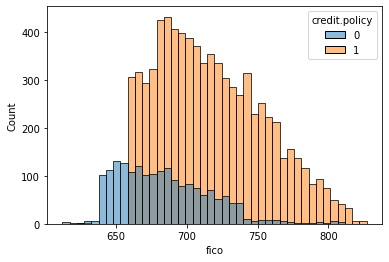

In [21]:
sns.histplot(x='fico', data=loans, hue='credit.policy')

<AxesSubplot:xlabel='fico', ylabel='Count'>

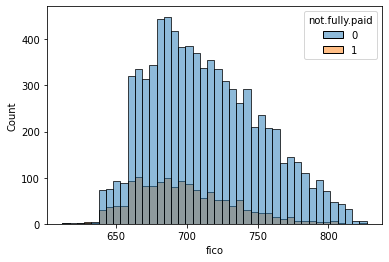

In [23]:
sns.histplot(x='fico', data=loans, hue='not.fully.paid')

<AxesSubplot:xlabel='purpose', ylabel='count'>

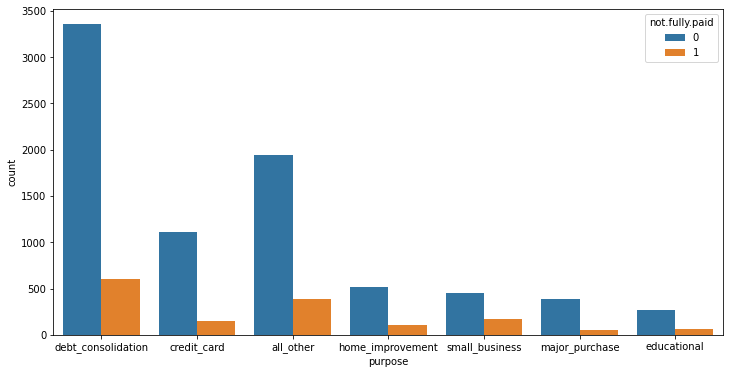

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose', data=loans, hue='not.fully.paid')

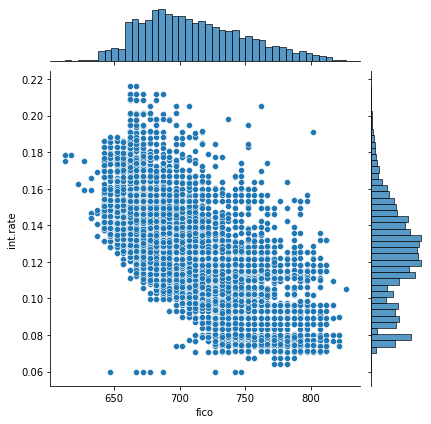

In [26]:
sns.jointplot(x='fico', y='int.rate', data=loans)

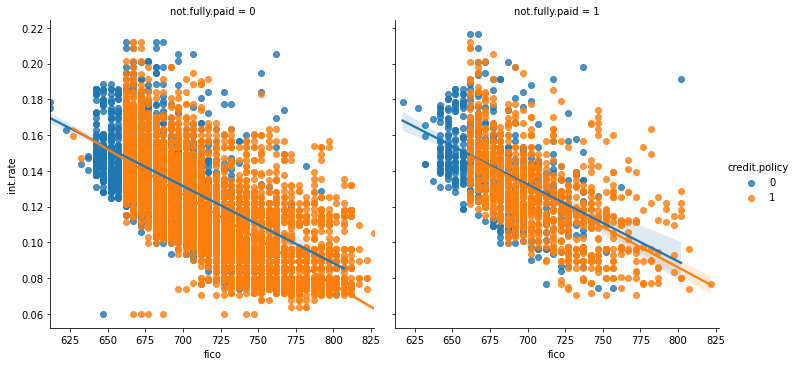

In [29]:
sns.lmplot(x='fico', y='int.rate', data=loans, hue='credit.policy', col='not.fully.paid')

## Configurando os dados

In [30]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Recursos categóricos

In [31]:
cat_feats = ['purpose']

final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [32]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [33]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Divisão dos dados em Treino-Teste

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = final_data.drop('not.fully.paid', axis=1)
Y = final_data['not.fully.paid']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

## Treino do modelo Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [38]:
pred = dtree.predict(X_test)

## Avaliando o modelo

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2404
           1       0.21      0.23      0.22       470

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.73      0.74      2874



In [41]:
print(confusion_matrix(Y_test, pred))

[[1997  407]
 [ 361  109]]


## Treino do modelo Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier(n_estimators=500)

rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500)

In [44]:
pred_rfc = rfc.predict(X_test)

In [45]:
print(classification_report(Y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2404
           1       0.24      0.01      0.02       470

    accuracy                           0.83      2874
   macro avg       0.54      0.50      0.46      2874
weighted avg       0.74      0.83      0.76      2874



In [46]:
print(confusion_matrix(Y_test, pred_rfc))

[[2388   16]
 [ 465    5]]
